In [6]:
import pandas as pd
import numpy as np

import folium
from folium import plugins

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import seaborn as sns
from scipy.stats import norm

In [8]:
abras=pd.read_excel('ranking abras.xlsx')
abras

,CLASS_2021,CLASS_2020,CNPJ,Razão Social,Sede,Faturamento Bruto em 2020 (R$),Nº de lojas,Nº de check-outs,Área de venda,Nº de funcionários,Fat._CKT_ 2020,Fat._M2_2020,Fat._Func._2020,Func._CKT_2020,Func._M2_2020,CKT_Loja_2020,M2_CKT_2020,M2_Loja_2020,Fat._Loja_ 2020
0,1,1,45.543.915/0001-81,CARREFOUR COMÉRCIO E INDÚSTRIA LTDA.,SP,74751000000,721.000000,N.D,2107971.0,95667.0,N.D,35461.114029,781366.615447,N.D,4.538345,N.D,N.D,2923.676838,1.036768e+08
1,2,novo,06.057.223/0001-71,ASSAÍ ATACADISTA.,SP,39400000000,184.000000,N.D,809000.0,50000.0,N.D,48702.101360,788000.000000,N.D,6.180470,N.D,N.D,4396.739130,2.141304e+08
2,3,2,47.508.411/0001-56,GPA.,SP,31063000000,873.000000,N.D,1194223.0,55750.0,N.D,26011.054887,557183.856502,N.D,4.668307,N.D,N.D,1367.953036,3.558190e+07
3,4,novo,03.995.515/0013-09,MATEUS SUPERMERCADO S.A.,MA,14352809355,159.000000,2014,328316.0,36108.0,7126519.044191,43716.448041,397496.658774,17.9285,10.997941,12.666667,163.016882,2064.880503,9.026924e+07
4,5,3,39.346.861/0350-38,CENCOSUD BRASIL COMERCIAL LTDA.,SP,9403007296,201.000000,2209,527370.0,23015.0,4256680.532368,17830.000372,408559.952031,10.418742,4.364109,10.99005,238.736985,2623.731343,4.678113e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,902,935,01.591.872/0001-34,ELI DE OLIVEIRA ROCHA- ME,MG,100000,1.000000,1,100.0,1.0,100000,1000.000000,100000.000000,1,1.000000,1,100,100.000000,1.000000e+05
910,Total 902 Participantes,NaN,NaN,NaN,NaN,362642456021,8452.000000,62082,11894018.0,753117.0,5841346.219854,30489.482698,481522.068976,12.131004,6.331897,7.345244,191.585613,1407.243019,4.290611e+07
911,NaN,NaN,NaN,NaN,NaN,2295931236331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,Total 280 demais (300 maiores menos as 20 pri...,NaN,NaN,NaN,NaN,109316744142,4403.000000,35608,3964151.0,301502.0,3070005.171366,27576.332017,362573.860678,8.467255,7.605714,8.087213,111.327539,900.329548,2.482779e+07


In [9]:
abras_br=abras.dropna()
abras_br

,CLASS_2021,CLASS_2020,CNPJ,Razão Social,Sede,Faturamento Bruto em 2020 (R$),Nº de lojas,Nº de check-outs,Área de venda,Nº de funcionários,Fat._CKT_ 2020,Fat._M2_2020,Fat._Func._2020,Func._CKT_2020,Func._M2_2020,CKT_Loja_2020,M2_CKT_2020,M2_Loja_2020,Fat._Loja_ 2020
0,1,1,45.543.915/0001-81,CARREFOUR COMÉRCIO E INDÚSTRIA LTDA.,SP,74751000000,721.0,N.D,2107971.0,95667.0,N.D,35461.114029,781366.615447,N.D,4.538345,N.D,N.D,2923.676838,1.036768e+08
1,2,novo,06.057.223/0001-71,ASSAÍ ATACADISTA.,SP,39400000000,184.0,N.D,809000.0,50000.0,N.D,48702.101360,788000.000000,N.D,6.180470,N.D,N.D,4396.739130,2.141304e+08
2,3,2,47.508.411/0001-56,GPA.,SP,31063000000,873.0,N.D,1194223.0,55750.0,N.D,26011.054887,557183.856502,N.D,4.668307,N.D,N.D,1367.953036,3.558190e+07
3,4,novo,03.995.515/0013-09,MATEUS SUPERMERCADO S.A.,MA,14352809355,159.0,2014,328316.0,36108.0,7126519.044191,43716.448041,397496.658774,17.9285,10.997941,12.666667,163.016882,2064.880503,9.026924e+07
4,5,3,39.346.861/0350-38,CENCOSUD BRASIL COMERCIAL LTDA.,SP,9403007296,201.0,2209,527370.0,23015.0,4256680.532368,17830.000372,408559.952031,10.418742,4.364109,10.99005,238.736985,2623.731343,4.678113e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,898,novo,68.982.024/0001-27,SUPERMERCADO JEA LTDA.,SP,170000,1.0,2,250.0,4.0,85000,680.000000,42500.000000,2,1.600000,2,125,250.000000,1.700000e+05
906,899,novo,29.736.893/0001-10,QUI-MIX COMÉRCIO DE ALIMENTOS E PRODUTOS LTDA.,BA,160000,1.0,1,100.0,6.0,160000,1600.000000,26666.666667,6,6.000000,1,100,100.000000,1.600000e+05
907,900,933,68.168.145/0001-30,SARGI & SARGI LTDA.,SP,155836,1.0,3,200.0,10.0,51945.333333,779.180000,15583.600000,3.333333,5.000000,3,66.666667,200.000000,1.558360e+05
908,901,934,01.445.663/0001-82,MINI MERCADO IRMÃOS MELO LTDA - ME,SP,120000,1.0,3,500.0,10.0,40000,240.000000,12000.000000,3.333333,2.000000,3,166.666667,500.000000,1.200000e+05


In [10]:
x0 = abras_br['Faturamento Bruto em 2020 (R$)']
y0 = abras_br['Nº de lojas']

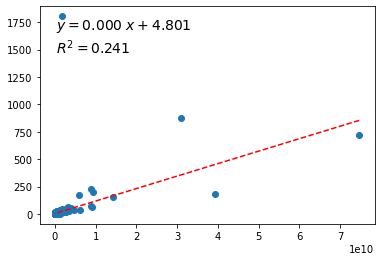

In [12]:
plt.scatter(x0, y0)
z0 = np.polyfit(x0, y0, 1)
p0 = np.poly1d(z0)
y0_hat = np.poly1d(z0)(x0)

text = f"$y={z0[0]:0.3f}\;x{z0[1]:+0.3f}$\n$R^2 = {r2_score(y0,y0_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')


plt.plot(x0,p0(x0),"r--")

In [13]:
#r² muito baixo

In [14]:
abras_MG = abras.loc[abras.Sede=='MG']

In [15]:
abras_MG

,CLASS_2021,CLASS_2020,CNPJ,Razão Social,Sede,Faturamento Bruto em 2020 (R$),Nº de lojas,Nº de check-outs,Área de venda,Nº de funcionários,Fat._CKT_ 2020,Fat._M2_2020,Fat._Func._2020,Func._CKT_2020,Func._M2_2020,CKT_Loja_2020,M2_CKT_2020,M2_Loja_2020,Fat._Loja_ 2020
7,7,6,04.641.376/0001-36,SUPERMERCADOS BH COMÉRCIO DE ALIMENTOS S.A.,MG,8971116513,226.0,2657,289981.0,23700.0,3376408.171998,30936.911429,378528.122911,8.919834,8.172949,11.756637,109.138502,1283.101770,3.969521e+07
10,10,8,01.928.075/0020-62,DMA DISTRIBUIDORA S.A.,MG,5836699203,170.0,2210,334603.0,17319.0,2641040.363348,17443.654728,337011.328772,7.836652,5.175985,13,151.404072,1968.252941,3.433352e+07
12,11,10,04.737.552/0011-00,MART MINAS DISTRIBUIÇÃO LTDA.,MG,4594721323,40.0,792,205659.0,6707.0,5801415.811869,22341.455142,685063.563888,8.468434,3.261224,19.8,259.670455,5141.475000,1.148680e+08
18,17,16,17.745.613/0001-50,SUPERMERCADO BAHAMAS S.A.,MG,3092253539,63.0,947,123338.0,9092.0,3265315.247096,25071.377345,340107.076441,9.600845,7.371613,15.031746,130.24076,1957.746032,4.908339e+07
21,20,15,10.319.375/0001-72,MULTI FORMATO DISTRIBUIDORA S.A.,MG,2953856263,51.0,592,79212.0,7405.0,4989622.065878,37290.514859,398900.238082,12.508446,9.348331,11.607843,133.804054,1553.176471,5.791875e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,879,916,19.838.168/0001-07,NORBERTO FERREIRA DE ALVARENGA - EPP,MG,600000,1.0,4,600.0,20.0,150000,1000.000000,30000.000000,5,3.333333,4,150,600.000000,6.000000e+05
887,880,923,20.855.045/0001-55,SUPERMERCADO VARANDA LTDA.,MG,559000,1.0,5,300.0,23.0,111800,1863.333333,24304.347826,4.6,7.666667,5,60,300.000000,5.590000e+05
895,888,922,25.313.834/0001-88,COMERCIAL ALESSANDRO LTDA. - ME,MG,438102,1.0,1,200.0,3.0,438102,2190.510000,146034.000000,3,1.500000,1,200,200.000000,4.381020e+05
903,896,932,25.969.676/0001-19,SEMI CHEDID - EPP,MG,240000,1.0,2,200.0,2.0,120000,1200.000000,120000.000000,1,1.000000,2,100,200.000000,2.400000e+05


In [16]:
x = abras_MG['Faturamento Bruto em 2020 (R$)']
y = abras_MG['Nº de lojas']
#densidade de kernel -# Gráfico padrão com estimativa de densidade de kernel e um histograma com o tamanho do compartimento Nº de lojas.
#plt.style.use('fivethirtyeight')
#plt.figure(figsize=(10,6))
#sns.distplot(abras_MG['Nº de lojas'], bins =20  )



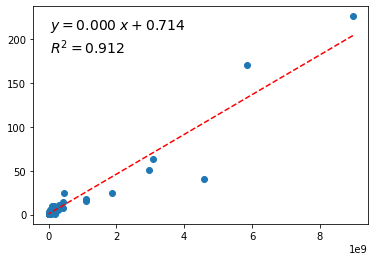

In [17]:

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_hat = np.poly1d(z)(x)

text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')


plt.plot(x,p(x),"r--")


In [18]:
#interessante notar que a maioria dos mercados de MG que estão rankeados possuem poucas lojas e faturam muito menos do que os stakeholders
#Dependência positiva de numero de lojas (Y) razão do faturamento (X)
#y=	variável dependente (numero de lojas)
# x é a variável independente
#A= intercepto, se x=0, y= 0.714
#B= coeficiente angular (inclinação da reta, se x "cresce" 1, y "cresce" 0.
#R² - Quanto mais alto o valor de R² melhor o modelo ajusta seus dados, 91,2%.

<AxesSubplot:>

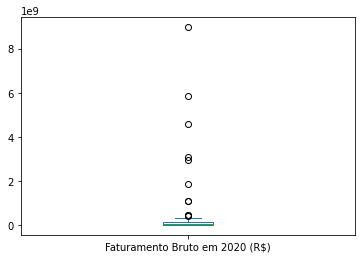

In [19]:
abras_MG['Faturamento Bruto em 2020 (R$)'].plot.box()

In [20]:
#Esse boxplot mostra os temos outliers na variável Faturamento Bruto em 2020 (R$) . Podemos afirmar que os valores um pouco abaixo de 1000000 são outliers.

In [21]:
abras_MG_2=abras_MG[['Razão Social','Faturamento Bruto em 2020 (R$)', 'Nº de lojas']]

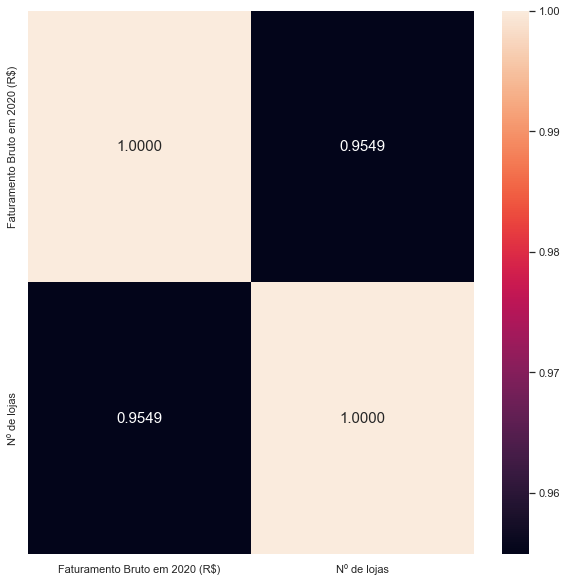

In [22]:
matriz0 = abras_MG_2.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(matriz0, vmax=1,annot_kws={'size': 15}, annot=True, fmt='.4f')
plt.show()
#Temos abaixo a matriz de correlação para fazer uma análise da associação entre as variáveis em questão.

In [23]:
abras_MG_2.describe()

,Faturamento Bruto em 2020 (R$),Nº de lojas
count,9.000000e+01,90.000000
mean,3.901748e+08,9.555556
std,1.286539e+09,30.529820
min,1.000000e+05,1.000000
25%,8.283849e+06,1.000000
50%,2.672083e+07,2.000000
75%,1.356199e+08,5.000000
max,8.971117e+09,226.000000


In [24]:
abras_top_4=abras_MG_2.loc[7:18]
abras_top_4

,Razão Social,Faturamento Bruto em 2020 (R$),Nº de lojas
7,SUPERMERCADOS BH COMÉRCIO DE ALIMENTOS S.A.,8971116513,226.0
10,DMA DISTRIBUIDORA S.A.,5836699203,170.0
12,MART MINAS DISTRIBUIÇÃO LTDA.,4594721323,40.0
18,SUPERMERCADO BAHAMAS S.A.,3092253539,63.0


<AxesSubplot:xlabel='Razão Social'>

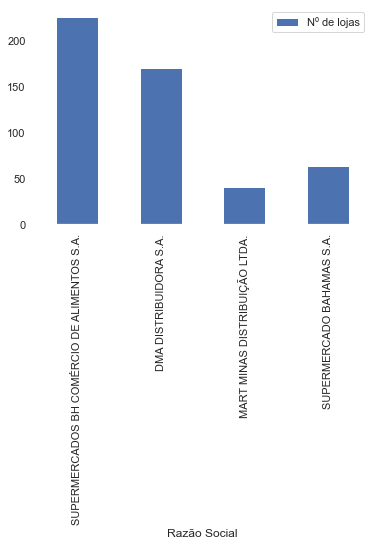

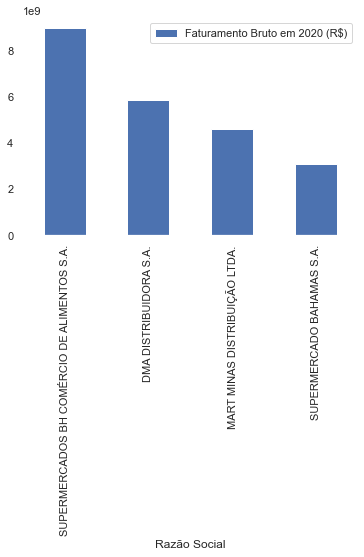

In [25]:
abras_top_4.plot(x='Razão Social', y="Nº de lojas", kind="bar")
abras_top_4.plot(x='Razão Social', y="Faturamento Bruto em 2020 (R$)", kind="bar")

In [26]:
abras_top_4.describe()

,Faturamento Bruto em 2020 (R$),Nº de lojas
count,4.000000e+00,4.000000
mean,5.623698e+09,124.750000
std,2.497838e+09,88.118765
min,3.092254e+09,40.000000
25%,4.219104e+09,57.250000
50%,5.215710e+09,116.500000
75%,6.620304e+09,184.000000
max,8.971117e+09,226.000000


In [27]:
#cout - contagem dos dados (linhas)
#mean - media dos dados
#std - desvio padrão -quantidade de variação ou dispersão da média
#min - valor minimo (no caso é Bahamas)
#25% - Q1, onde 25% dos dados são menores que ou iguais a este valor
#50% - Q2, onde 50% dos dados são menores que ou iguais a este valor
#75% - Q3, onde 75% dos dados são menores que ou iguais a este valor
#max  - valor maximo (no caso é BH)

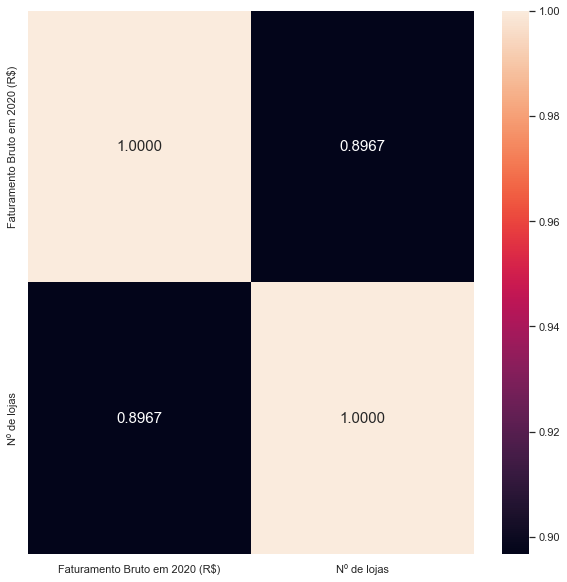

In [28]:
matriz1 = abras_top_4.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(matriz1, vmax=1,annot_kws={'size': 15}, annot=True, fmt='.4f')
plt.show()
#Temos abaixo a matriz de correlação para fazer uma análise da associação entre as variáveis em questão.

In [29]:
x1 = abras_top_4['Faturamento Bruto em 2020 (R$)']
y1 = abras_top_4['Nº de lojas']

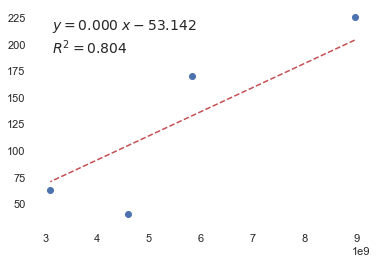

In [30]:
plt.scatter(x1, y1)
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
y1_hat = np.poly1d(z1)(x1)

text = f"$y={z[0]:0.3f}\;x{z1[1]:+0.3f}$\n$R^2 = {r2_score(y1,y1_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')


plt.plot(x1,p(x1),"r--")

<AxesSubplot:>

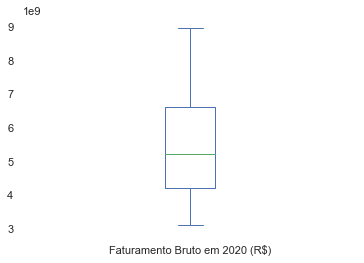

In [31]:
abras_top_4['Faturamento Bruto em 2020 (R$)'].plot.box()


<AxesSubplot:>

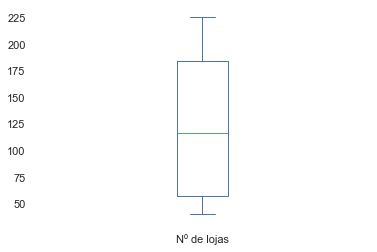

In [32]:
abras_top_4['Nº de lojas'].plot.box()

In [33]:
#Aqui eu quis mostrar como manipular e extrair informações através de técnicas estatísticas e visualização gráfica dos dados. 
#Um resumo do que foi descoberto para fazer a analise final desses dados:

#A maioria dos usuários é do sexo masculino
#Com idade entre 26 a 30 anos
#Não são casados
#Residem na cidade de categoria B
#Moram 1 ano na cidade atual
#E compraram mais produtos da categoria 1.

In [34]:
df_super=pd.read_excel('Cidades Supermercados MG - Copia.xlsx')
df_super

,codigo_ibge_1,cidade,sup_bh,grupo_dma,mart_minas,grupo_bahamas,total_lojas
0,3100203.0,Abaeté,1,0,0,0,1
1,3101508.0,Além Paraíba,0,0,0,2,2
2,3101607.0,Alfenas,0,1,1,0,2
3,3101706.0,Almenara,0,1,0,0,1
4,3103504.0,Araguari,0,0,1,1,2
...,...,...,...,...,...,...,...
107,3170800.0,Várzea da Palma,2,0,0,0,2
108,3171204.0,Vespasiano,5,2,0,0,7
109,3171303.0,Viçosa,0,1,0,2,3
110,3172004.0,Visconde do Rio Branco,0,0,0,1,1


In [35]:
cidades=pd.read_csv('cidades brasileiras.csv')
cidades.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15


In [36]:
cities_super = df_super.loc[df_super.codigo_ibge_1>0]
cities_super

,codigo_ibge_1,cidade,sup_bh,grupo_dma,mart_minas,grupo_bahamas,total_lojas
0,3100203.0,Abaeté,1,0,0,0,1
1,3101508.0,Além Paraíba,0,0,0,2,2
2,3101607.0,Alfenas,0,1,1,0,2
3,3101706.0,Almenara,0,1,0,0,1
4,3103504.0,Araguari,0,0,1,1,2
...,...,...,...,...,...,...,...
106,3170701.0,Varginha,1,1,1,0,3
107,3170800.0,Várzea da Palma,2,0,0,0,2
108,3171204.0,Vespasiano,5,2,0,0,7
109,3171303.0,Viçosa,0,1,0,2,3


In [37]:
cidades=cidades.set_index('codigo_ibge')

In [38]:
cidades

,nome,latitude,longitude,capital,codigo_uf
codigo_ibge,,,,,
5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
5200100,Abadiânia,-16.19700,-48.7057,0,52
3100203,Abaeté,-19.15510,-45.4444,0,31
1500107,Abaetetuba,-1.72183,-48.8788,0,15
...,...,...,...,...,...
2933604,Xique-Xique,-10.82300,-42.7245,0,29
2517407,Zabelê,-8.07901,-37.1057,0,25
3557154,Zacarias,-21.05060,-50.0552,0,35


In [39]:
cities_super=cities_super.join(cidades, on='codigo_ibge_1')

In [40]:
cities_super

,codigo_ibge_1,cidade,sup_bh,grupo_dma,mart_minas,grupo_bahamas,total_lojas,nome,latitude,longitude,capital,codigo_uf
0,3100203.0,Abaeté,1,0,0,0,1,Abaeté,-19.1551,-45.4444,0,31
1,3101508.0,Além Paraíba,0,0,0,2,2,Além Paraíba,-21.8797,-42.7176,0,31
2,3101607.0,Alfenas,0,1,1,0,2,Alfenas,-21.4256,-45.9477,0,31
3,3101706.0,Almenara,0,1,0,0,1,Almenara,-16.1785,-40.6942,0,31
4,3103504.0,Araguari,0,0,1,1,2,Araguari,-18.6456,-48.1934,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...
106,3170701.0,Varginha,1,1,1,0,3,Varginha,-21.5556,-45.4364,0,31
107,3170800.0,Várzea da Palma,2,0,0,0,2,Várzea da Palma,-17.5944,-44.7226,0,31
108,3171204.0,Vespasiano,5,2,0,0,7,Vespasiano,-19.6883,-43.9239,0,31
109,3171303.0,Viçosa,0,1,0,2,3,Viçosa,-20.7559,-42.8742,0,31


In [41]:
coord_cities=cities_super[['cidade','latitude','longitude', 'total_lojas']]

In [42]:
coord_cities

,cidade,latitude,longitude,total_lojas
0,Abaeté,-19.1551,-45.4444,1
1,Além Paraíba,-21.8797,-42.7176,2
2,Alfenas,-21.4256,-45.9477,2
3,Almenara,-16.1785,-40.6942,1
4,Araguari,-18.6456,-48.1934,2
...,...,...,...,...
106,Varginha,-21.5556,-45.4364,3
107,Várzea da Palma,-17.5944,-44.7226,2
108,Vespasiano,-19.6883,-43.9239,7
109,Viçosa,-20.7559,-42.8742,3


In [43]:
coord_cities1=coord_cities.set_index('cidade')
display(coord_cities1)

,latitude,longitude,total_lojas
cidade,,,
Abaeté,-19.1551,-45.4444,1
Além Paraíba,-21.8797,-42.7176,2
Alfenas,-21.4256,-45.9477,2
Almenara,-16.1785,-40.6942,1
Araguari,-18.6456,-48.1934,2
...,...,...,...
Varginha,-21.5556,-45.4364,3
Várzea da Palma,-17.5944,-44.7226,2
Vespasiano,-19.6883,-43.9239,7


In [44]:
#coord_cities.plot(x='cidade', y="total_lojas", kind="bar") ficou ruim de vizualizar, tentarei por outra biblioteca e sem usar nomes.

C:\Users\Lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_lojas', ylabel='count'>

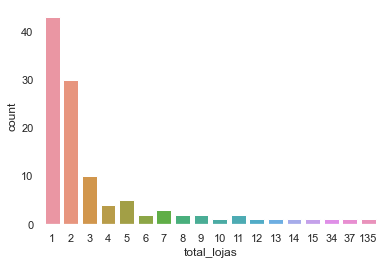

In [45]:
sns.countplot(coord_cities.total_lojas)

In [46]:
#no caso, a maioria das cidades possuem 1 loja.

In [47]:
coord=cities_super[['latitude','longitude', 'total_lojas']]

In [48]:
coord

,latitude,longitude,total_lojas
0,-19.1551,-45.4444,1
1,-21.8797,-42.7176,2
2,-21.4256,-45.9477,2
3,-16.1785,-40.6942,1
4,-18.6456,-48.1934,2
...,...,...,...
106,-21.5556,-45.4364,3
107,-17.5944,-44.7226,2
108,-19.6883,-43.9239,7
109,-20.7559,-42.8742,3


In [49]:
coord=coord.dropna()

In [50]:
coord

,latitude,longitude,total_lojas
0,-19.1551,-45.4444,1
1,-21.8797,-42.7176,2
2,-21.4256,-45.9477,2
3,-16.1785,-40.6942,1
4,-18.6456,-48.1934,2
...,...,...,...
106,-21.5556,-45.4364,3
107,-17.5944,-44.7226,2
108,-19.6883,-43.9239,7
109,-20.7559,-42.8742,3


In [51]:
mapa_base=folium.Map(width='100%', height='100%', location=[-18.1, -44.38], zoom_start=6)

In [52]:
mapa_base

In [53]:
mapa_base=mapa_base.add_child(plugins.HeatMap(coord))

In [54]:
mapa_base

In [55]:
for i in range(0, len(cities_super)):
    folium.Circle(
        location= [cities_super.iloc[i]['latitude'], 
                             cities_super.iloc[i]['longitude'] ], 
        color='#0C00D6', fill='#0E1A1D', 
        tooltip='<li><bold> Cidade:'+ str(cities_super.iloc[i]['cidade']) + 
                '<li><bold> Total de lojas:'+ str(cities_super.iloc[i]['total_lojas'])+
                '<li><bold> Sup.BH:'+ str(cities_super.iloc[i]['sup_bh'])+
                '<li><bold> Grup.DMA:'+ str(cities_super.iloc[i]['grupo_dma'])+
                '<li><bold> Mart Minas:'+ str(cities_super.iloc[i]['mart_minas'])+
                '<li><bold> Grup.Bahamas:'+ str(cities_super.iloc[i]['grupo_bahamas']),
        radius= (cities_super.iloc[i]['total_lojas']**1.6)).add_to(mapa_base)

In [56]:
mapa_base

In [57]:
mapa_base.save('mapa-calor-4-maiores-supermercados-mg.html')

C:\Users\Lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_lojas', ylabel='Density'>

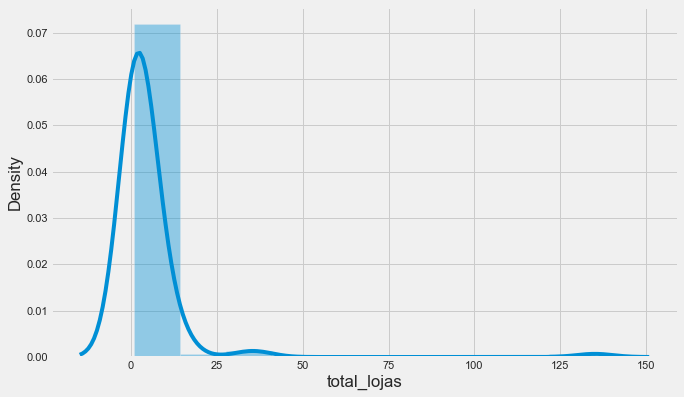

In [58]:
#densidade de kernel -# Gráfico padrão com estimativa de densidade de kernel e um histograma com o tamanho do compartimento Nº de lojas.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.distplot(coord_cities1['total_lojas'], bins =10  )

In [59]:
#concentração maior de cidades com menos de 25 lojas em relação a cidades com mais

In [60]:
#Aqui eu quis mostrar como manipular e extrair informações através de técnicas estatísticas e visualização gráfica dos dados. 
#Um resumo do que foi descoberto para fazer a analise final desses dados:

#A maioria dos usuários é do sexo masculino
#Com idade entre 26 a 30 anos
#Não são casados
#Residem na cidade de categoria B
#Moram 1 ano na cidade atual
#E compraram mais produtos da categoria 1.